# Pie charts

What can pie charts tell us? 
	- a general graphical sense of the contents and distribution of some single variable in our dataset
	- establish whether we need to perform some binning for histograms
	- assist in data exploration

Pie charts can be made regardless of whether a variable is categorical or numeric. Either way, we need to have small number of distinct values for an 
effective visual presentation.

Basic syntax:
    pie( x=table(data.frame.column.name) )


In [2]:
# Load the MASS library, and use the Cars93 dataset
library(MASS)
cr = Cars93

# Super basic pie chart
To create a pie chart we need to compute the counts of distinct values of our variable. Use a contingency table to count up numbers of cars having certain numbers 
of cylinders:

In [3]:
table(cr$Cylinders)


     3      4      5      6      8 rotary 
     3     49      2     31      7      1 

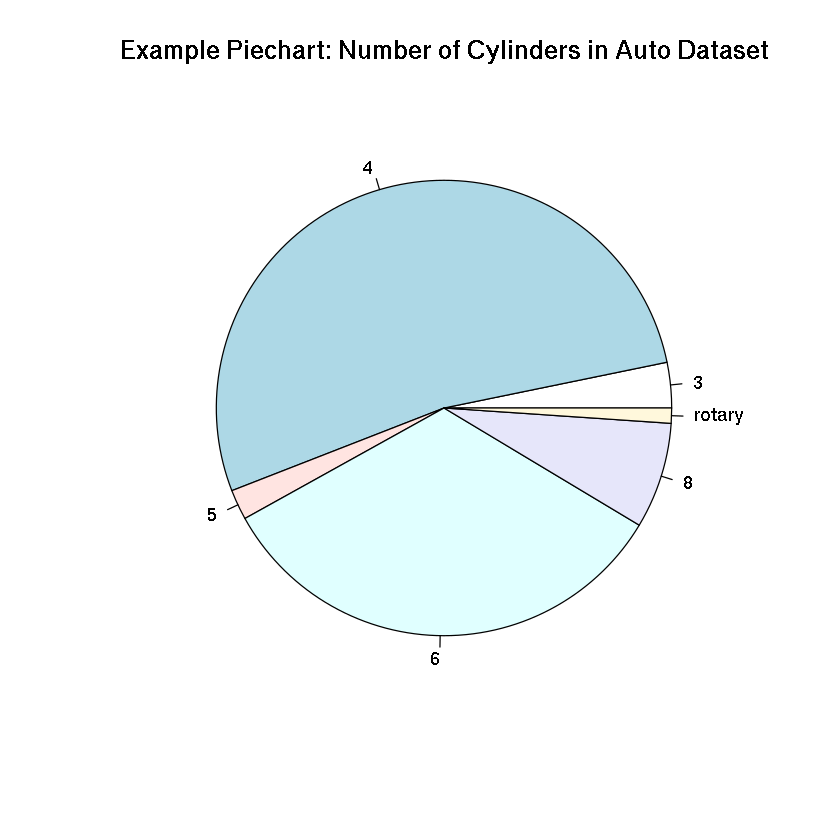

In [4]:
# plain jane: pie chart of Cylinders (categorical) from Cars93 data

slices <-table(cr$Cylinders)
lbls <- levels(cr$Cylinders)

pie(slices, 
    labels = lbls, 
    main="Example Piechart: Number of Cylinders in Auto Dataset")

# Pie chart with computed percentages

 A statement from the R pie() function help text. Do you agree?
   "Pie charts are a very bad way of displaying information. The eye is good at 
   judging linear measures and bad at judging relative areas. A bar chart...is a 
   preferable way of displaying this type of data."

 Let's compute percentages of all areas to assist us in interpreting the pie chart.

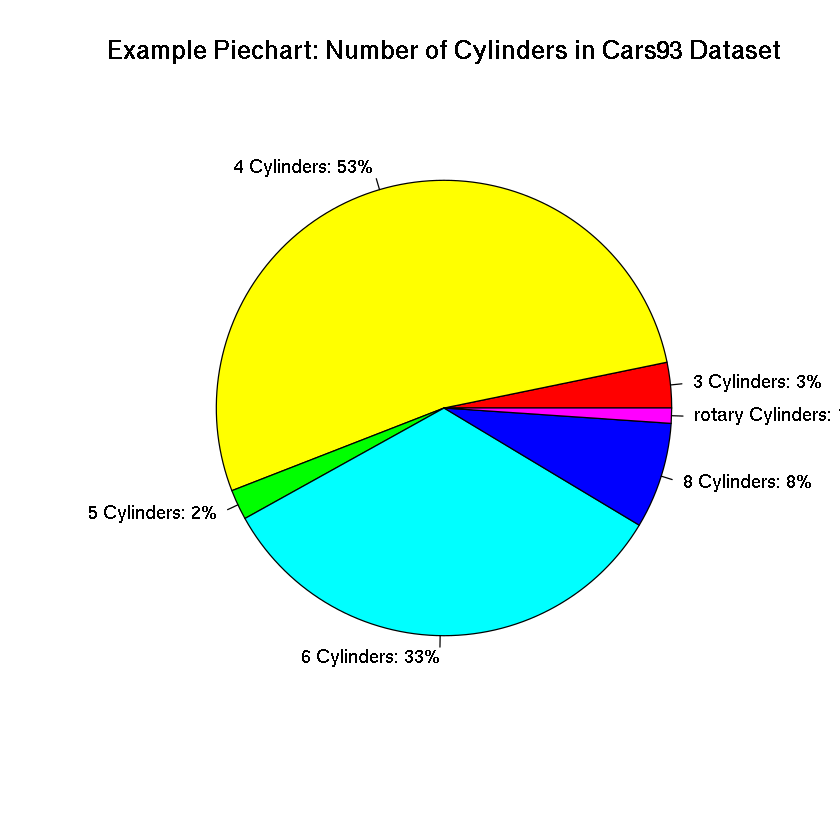

In [5]:
# --------- pie chart with computed percentages -----------------  

slices <-table(cr$Cylinders)
lbls <- levels(cr$Cylinders)
pct <- round(slices/sum(slices)*100)
lbls <- paste(lbls, "Cylinders:", pct) # add percents to labels
lbls <- paste(lbls,"%",sep="") # add % to labels

# pie chart of Cylinders from Cars93 data        
# same chart, with percents on the labels:    
pie(slices,
    labels = lbls, 
    col=rainbow(length(lbls)),
    main="Example Piechart: Number of Cylinders in Cars93 Dataset")

# Piechart function: write once, explore your dataset

In [6]:
# --------------- Piechart function with percentages ------------------

# Here is a general makePie() function, plus calls for a number
# of different variables in the Cars93 dataset:

# ----------------------------------------------------
# makePie()
#   col: column (numeric or categorical) in Cars93 dataset
#   name: string name to appear in title of piechart
#   sub: subtitle to appeaer under the title, blank by default
#
# Plot pie chart with percents calculated for each slice,
# adding a title and optional subtitle.
#
# Tip: vary the location of your subtitle by adding the line
# parameter to title() as follows:
#   title(sub=subname, line=-30) 
# ----------------------------------------------------
makePie <- function(col, name, subname=NA) {
  
    # determine slices in the pie:
    slices <-table(col)

    # check for categorical or numeric and assign labels:
    if (is.factor(col)) {
        lbls <- levels(col)
    } else { 
        # make it a factor, then get levels:
        lbls <- levels(factor(col))
    }

    # calculate percentage for each slice
    pct <- round(slices/sum(slices)*100)

    # construct labels for the slices:
    lbls <- paste(lbls, ":", pct) # add percents to labels
    lbls <- paste(lbls, "%" ,sep="") # add % to labels

    # plot it:
    p <- pie(slices,
        labels = lbls,             # add the labels
        col=rainbow(length(lbls)), # assign fancy colors
        main=paste(name, "in Cars93 Dataset")
    )

    # add a subtitle
    title(sub=subname) 
}

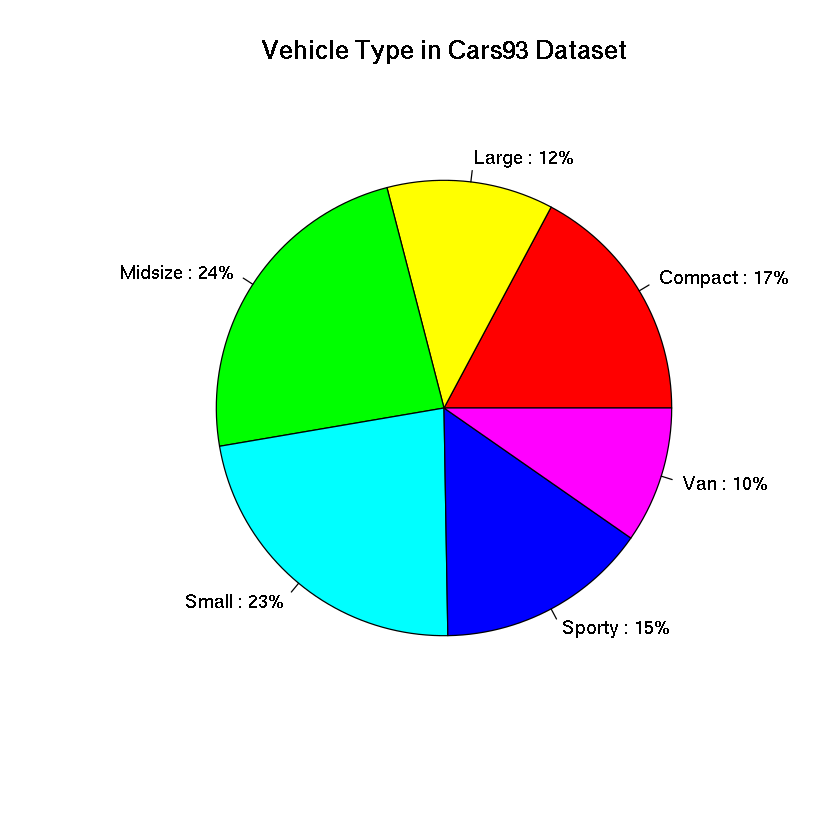

In [7]:
makePie(cr$Type, "Vehicle Type")

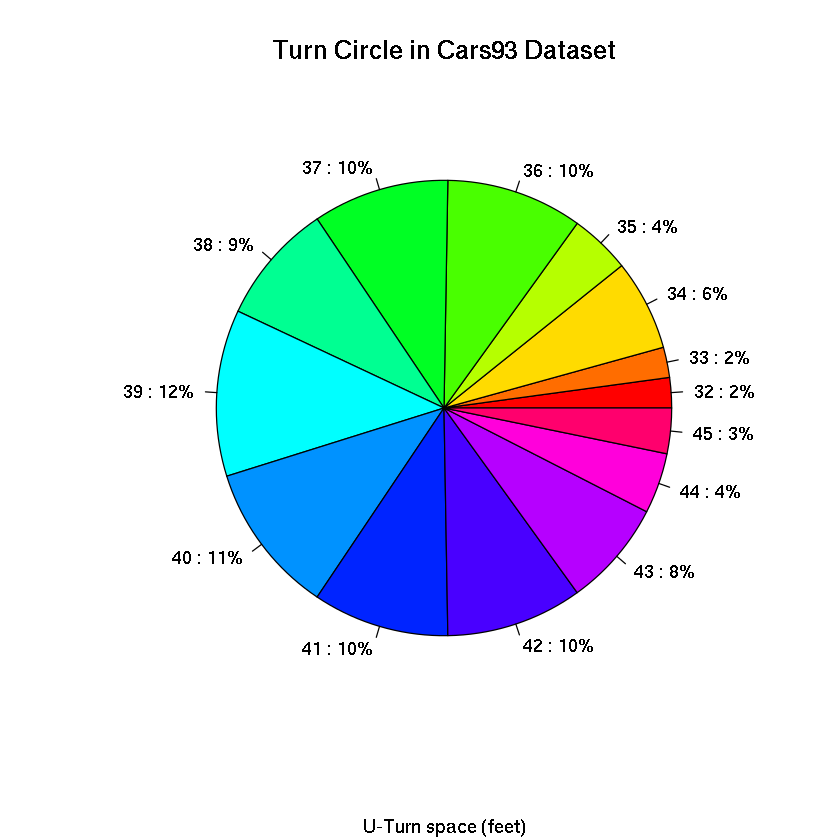

In [9]:
# Is this an effective pie chart? Is there a better way to represent this information? 
makePie(cr$Turn.circle, "Turn Circle", "U-Turn space (feet)")

## Explore

There are a great number of interesting variables in this dataset that help discriminate between different auto types in different ways.

Use the makePie() function to create some additional pie charts, exploring variables such as:
- Air bags
- Vehicle drivetrain type
- Manual Transmission availability

## Consider

Identify some variables in Cars93 that have too many possible values to make an effective pie chart. Instead, try hist or barplot to represent them. Can you think of another way to display this information?

Exercise: after collecting similar horsepower or engine size data into bins or groups, plot an effective pie chart.